In [2]:
#Here we import all the necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import time
import amuse.plot as plot
from IPython.display import clear_output
from amuse.lab import units, constants
from amuse.ext.orbital_elements import new_binary_from_orbital_elements
from amuse.ext.orbital_elements import get_orbital_elements_from_binary
from amuse.ext.orbital_elements import get_orbital_elements_from_binaries
from amuse.lab import Particles
from amuse.lab import nbody_system
from amuse.io import write_set_to_file, read_set_from_file

In [29]:
data_loc = "Results/"

In [34]:
logtimes = ['-1e9','6.698','7.0','7.176','7.301','7.397','7.477','7.544','7.602','7.653','7.698','7.740','7.778','7.812','7.845','7.875','7.903','7.929','7.954','7.977','8']

runs = ['Vanilla_run4', 'Vanilla_run5', 'Vanilla_run6', 'MWG_run4', 'MWG_run5', 'MWG_run6']
for run in runs:
    for i in range(len(logtimes)):
        if logtimes[i] != '-1e9' and logtimes[i] != '8':
            exec(run+'_'+str(i)+'= read_set_from_file(data_loc+\"'+run+'_time='+logtimes[i]+'.hdf5\", format="hdf5")')
        elif logtimes[i] == '-1e9':
            exec(run+'_'+str(i)+'= read_set_from_file(data_loc+\"'+run+'_time=-inf.hdf5\", format="hdf5")')
        elif logtimes[i] == '8':
            exec(run+'_'+str(i)+'= read_set_from_file(data_loc+\"'+run+'_final.hdf5\", format="hdf5")')

logtimes = [-1e9,6.698,7.0,7.176,7.301,7.397,7.477,7.544,7.602,7.653,7.698,7.740,7.778,7.812,7.845,7.875,7.903,7.929,7.954,7.977,8]
times = 10**np.array(logtimes)

In [37]:
sets_van4, sets_van5, sets_van6, sets_mwg4, sets_mwg5, sets_mwg6 = [], [], [], [], [], []
for i in range(21):
    exec("sets_van4.append(Vanilla_run4_"+str(i)+")")
    exec("sets_van5.append(Vanilla_run5_"+str(i)+")")
    exec("sets_van6.append(Vanilla_run6_"+str(i)+")")
    exec("sets_mwg4.append(MWG_run4_"+str(i)+")")
    exec("sets_mwg5.append(MWG_run5_"+str(i)+")")
    exec("sets_mwg6.append(MWG_run6_"+str(i)+")")

In [7]:
p4van = np.load('percentage4vanilla.npy')
p5van = np.load('percentage5vanilla.npy')
p6van = np.load('percentage6vanilla.npy')
p4mwg = np.load('percentage4MWG.npy')
p5mwg = np.load('percentage5MWG.npy')
p6mwg = np.load('percentage6MWG.npy')

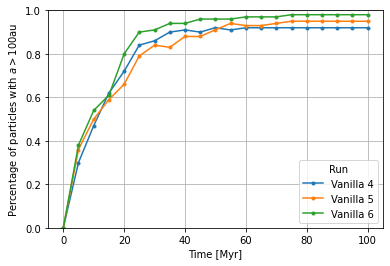

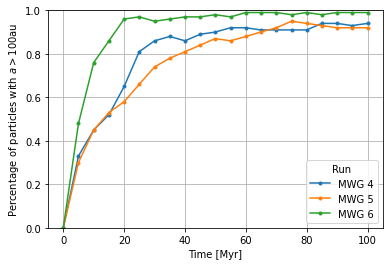

In [12]:
plt.plot(times/1e6, p4van, marker='.', label='Vanilla 4')
plt.plot(times/1e6, p5van, marker='.', label='Vanilla 5')
plt.plot(times/1e6, p6van, marker='.', label='Vanilla 6')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of particles with $a>100$au")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

plt.plot(times/1e6, p4mwg, marker='.', label='MWG 4')
plt.plot(times/1e6, p5mwg, marker='.', label='MWG 5')
plt.plot(times/1e6, p6mwg, marker='.', label='MWG 6')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of particles with $a>100$au")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

In [15]:
p4van = np.load('vrel_vesc_percentage4vanilla.npy')
p5van = np.load('vrel_vesc_percentage5vanilla.npy')
p6van = np.load('vrel_vesc_percentage6vanilla.npy')
p4mwg = np.load('vrel_vesc_percentage4MWG.npy')
p5mwg = np.load('vrel_vesc_percentage5MWG.npy')
p6mwg = np.load('vrel_vesc_percentage6MWG.npy')

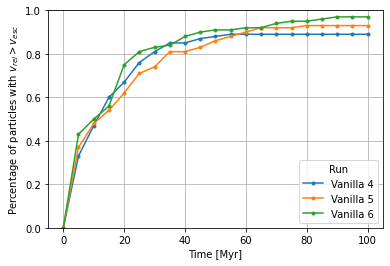

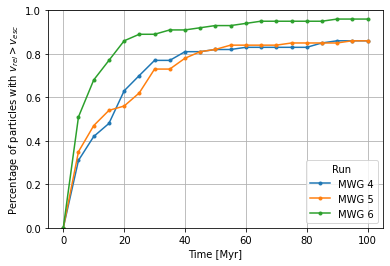

In [16]:
plt.plot(times/1e6, p4van, marker='.', label='Vanilla 4')
plt.plot(times/1e6, p5van, marker='.', label='Vanilla 5')
plt.plot(times/1e6, p6van, marker='.', label='Vanilla 6')

plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of particles with $v_{rel}>v_{esc}$")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()


plt.plot(times/1e6, p4mwg, marker='.', label='MWG 4')
plt.plot(times/1e6, p5mwg, marker='.', label='MWG 5')
plt.plot(times/1e6, p6mwg, marker='.', label='MWG 6')

plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of particles with $v_{rel}>v_{esc}$")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

In [24]:
p4van = np.load('deleted_percentage4vanilla.npy')
p5van = np.load('deleted_percentage5vanilla.npy')
p6van = np.load('deleted_percentage6vanilla.npy')
p4mwg = np.load('deleted_percentage4MWG.npy')
p5mwg = np.load('deleted_percentage5MWG.npy')
p6mwg = np.load('deleted_percentage6MWG.npy')

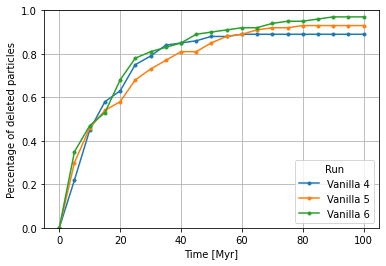

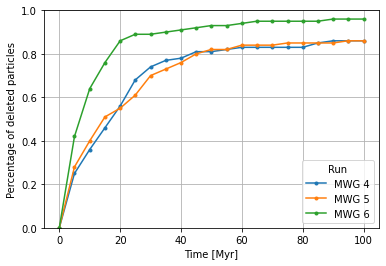

In [25]:
plt.plot(times/1e6, p4van, marker='.', label='Vanilla 4')
plt.plot(times/1e6, p5van, marker='.', label='Vanilla 5')
plt.plot(times/1e6, p6van, marker='.', label='Vanilla 6')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of deleted particles")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

plt.plot(times/1e6, p4mwg, marker='.', label='MWG 4')
plt.plot(times/1e6, p5mwg, marker='.', label='MWG 5')
plt.plot(times/1e6, p6mwg, marker='.', label='MWG 6')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of deleted particles")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

In [51]:
p4van = np.load('pot_oort_percentage4vanilla.npy')
p5van = np.load('pot_oort_percentage5vanilla.npy')
p6van = np.load('pot_oort_percentage6vanilla.npy')
p4mwg = np.load('pot_oort_percentage4MWG.npy')
p5mwg = np.load('pot_oort_percentage5MWG.npy')
p6mwg = np.load('pot_oort_percentage6MWG.npy')

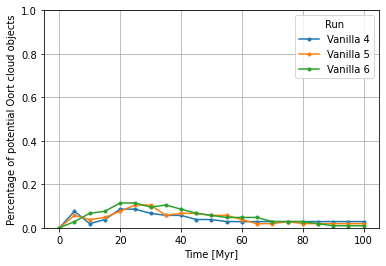

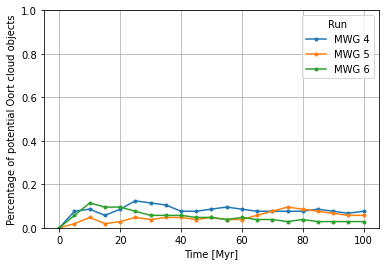

In [52]:
plt.plot(times/1e6, p4van, marker='.', label='Vanilla 4')
plt.plot(times/1e6, p5van, marker='.', label='Vanilla 5')
plt.plot(times/1e6, p6van, marker='.', label='Vanilla 6')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of potential Oort cloud objects")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

plt.plot(times/1e6, p4mwg, marker='.', label='MWG 4')
plt.plot(times/1e6, p5mwg, marker='.', label='MWG 5')
plt.plot(times/1e6, p6mwg, marker='.', label='MWG 6')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of potential Oort cloud objects")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

In [55]:
p5mwg

array([ 0.        ,  0.01904762,  0.04761905,  0.01904762,  0.02857143,
        0.04761905,  0.03809524,  0.04761905,  0.04761905,  0.03809524,
        0.04761905,  0.03809524,  0.03809524,  0.05714286,  0.07619048,
        0.0952381 ,  0.08571429,  0.07619048,  0.06666667,  0.05714286,
        0.05714286])

In [8]:
Oort_a_van4 = np.load('begin_a_pot_Oort_4vanilla.npy')
Oort_a_van5 = np.load('begin_a_pot_Oort_5vanilla.npy')
Oort_a_van6 = np.load('begin_a_pot_Oort_6vanilla.npy')
Oort_a_mwg4 = np.load('begin_a_pot_Oort_4mwg.npy')
Oort_a_mwg5 = np.load('begin_a_pot_Oort_5mwg.npy')
Oort_a_mwg6 = np.load('begin_a_pot_Oort_6mwg.npy')

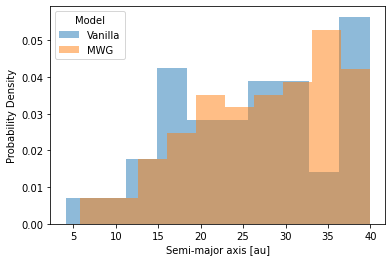

In [14]:
Oort_as_van = np.append(np.append(Oort_a_van4, Oort_a_van5), Oort_a_van6)
Oort_as_mwg = np.append(np.append(Oort_a_mwg4, Oort_a_mwg5), Oort_a_mwg6)

plt.hist(Oort_as_van, alpha=0.5, label='Vanilla', density=True)
plt.hist(Oort_as_mwg, alpha=0.5, label='MWG', density=True)
plt.xlabel('Semi-major axis [au]')
plt.ylabel('Probability Density')
plt.legend(title='Model')
plt.show()

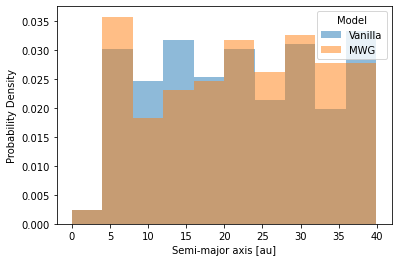

In [50]:
def a_orbit(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[2]

van4_initial_as = a_orbit(sets_van4[0][0], sets_van4[0]).in_(units.AU).number
van5_initial_as = a_orbit(sets_van5[0][0], sets_van5[0]).in_(units.AU).number
van6_initial_as = a_orbit(sets_van6[0][0], sets_van6[0]).in_(units.AU).number

vanilla_initial_as = np.append(np.append(van4_initial_as, van5_initial_as), van6_initial_as)

mwg4_initial_as = a_orbit(sets_mwg4[0][0], sets_mwg4[0]).in_(units.AU).number
mwg5_initial_as = a_orbit(sets_mwg5[0][0], sets_mwg5[0]).in_(units.AU).number
mwg6_initial_as = a_orbit(sets_mwg6[0][0], sets_mwg6[0]).in_(units.AU).number

mwg_initial_as = np.append(np.append(mwg4_initial_as, mwg5_initial_as), mwg6_initial_as)

plt.hist(vanilla_initial_as, alpha=0.5, density=True, label='Vanilla')
plt.hist(mwg_initial_as, alpha=0.5, density=True, label='MWG')
plt.xlabel("Semi-major axis [au]")
plt.ylabel("Probability Density")
plt.legend(title='Model');

In [17]:
Oort_e_van4 = np.load('begin_e_pot_Oort_4vanilla.npy')
Oort_e_van5 = np.load('begin_e_pot_Oort_5vanilla.npy')
Oort_e_van6 = np.load('begin_e_pot_Oort_6vanilla.npy')
Oort_e_mwg4 = np.load('begin_e_pot_Oort_4mwg.npy')
Oort_e_mwg5 = np.load('begin_e_pot_Oort_5mwg.npy')
Oort_e_mwg6 = np.load('begin_e_pot_Oort_6mwg.npy')

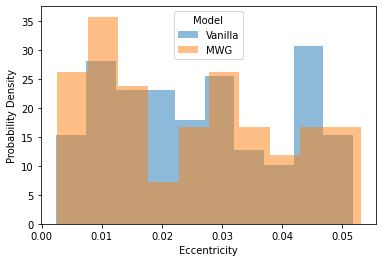

In [18]:
Oort_es_van = np.append(np.append(Oort_e_van4, Oort_e_van5), Oort_e_van6)
Oort_es_mwg = np.append(np.append(Oort_e_mwg4, Oort_e_mwg5), Oort_e_mwg6)

plt.hist(Oort_es_van, alpha=0.5, label='Vanilla', density=True)
plt.hist(Oort_es_mwg, alpha=0.5, label='MWG', density=True)
plt.xlabel('Eccentricity')
plt.ylabel('Probability Density')
plt.legend(title='Model')
plt.show()

In [20]:
Oort_i_van4 = np.load('begin_i_pot_Oort_4vanilla.npy')
Oort_i_van5 = np.load('begin_i_pot_Oort_5vanilla.npy')
Oort_i_van6 = np.load('begin_i_pot_Oort_6vanilla.npy')
Oort_i_mwg4 = np.load('begin_i_pot_Oort_4mwg.npy')
Oort_i_mwg5 = np.load('begin_i_pot_Oort_5mwg.npy')
Oort_i_mwg6 = np.load('begin_i_pot_Oort_6mwg.npy')

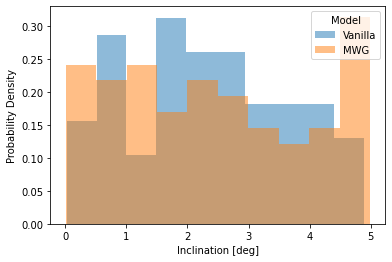

In [23]:
Oort_is_van = np.append(np.append(Oort_i_van4, Oort_i_van5), Oort_i_van6)
Oort_is_mwg = np.append(np.append(Oort_i_mwg4, Oort_i_mwg5), Oort_i_mwg6)

plt.hist(Oort_is_van, alpha=0.5, label='Vanilla', density=True)
plt.hist(Oort_is_mwg, alpha=0.5, label='MWG', density=True)
plt.xlabel('Inclination [deg]')
plt.ylabel('Probability Density')
plt.legend(title='Model')
plt.show()